In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [ ]:
df = pd.read_csv('credit_train_new.csv',low_memory=False,skiprows=0)
# df = df.set_index(['Loan ID'])
print(df.columns)
# print(df.columns)

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')


In [ ]:
dataset = df.iloc[:,2:111] #Removing Empty Columns
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
df = df.replace({"Loan_Status": di})
df.head()
print("Current shape: ", df.shape)

Current shape:  (77695, 19)


In [ ]:
#Data encoding
# df['grade'] = df['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df["Home Ownership"] = df["Home Ownership"].map({"Home Mortgage":6,"Rent":5,"Own Home":4,"Other":3,"NaN":2,"Any":1})
df["Years in current job"] = df["Years in current job"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
# df["Years in current job"] = df["Years in current job"].apply(lambda x:int(x))
print("Current shape of dataset :",df.shape)
df.head()

Current shape of dataset : (77695, 19)


,Loan_ID,Customer_ID,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,e3beabbb-d91d-40e2-8b2a-bbb10ee4e90a,c219d51c-2e18-4c48-855c-f23cb17cd542,0,167728,Short Term,708.0,754908.0,3,5.0,Debt Consolidation,4567.22,8.9,NaN,8,0,137674,358226.0,0.0,0.0
1,bb8b8f76-900f-41d2-8b35-08753e84a807,c7e0249e-42ed-41d6-a055-efc5fd24778f,0,405130,Short Term,701.0,778620.0,8,6.0,Debt Consolidation,24007.45,22.5,62.0,18,0,1136181,1414600.0,0.0,0.0
2,c477c970-0702-4ab2-a701-af68f880ce54,18b7a95a-8fee-4e14-bebb-dd3c41316372,1,22242,Short Term,NaN,NaN,2,5.0,Debt Consolidation,5841.74,6.8,NaN,8,0,75924,226556.0,0.0,0.0
3,fc6f4552-c098-4540-ac22-9a7e23d67a78,4213db91-8e56-4ac4-9a76-1ee20c91da11,0,210012,Short Term,736.0,1138385.0,10,6.0,Debt Consolidation,14514.29,9.2,25.0,6,0,31616,46948.0,0.0,0.0
4,5a4a7534-2c92-412c-badd-0f97dfd62335,384f209e-7bb0-4e9d-81b4-959bb3c3a76c,0,99999999,Short Term,738.0,981768.0,10,6.0,Debt Consolidation,22826.22,14.6,NaN,14,1,175047,266684.0,1.0,0.0


In [ ]:
#Filling the missing values
df.fillna(df.mean(), inplace=True)
HTML(df.tail().to_html())
print(df.shape)
df

(77695, 19)


,Loan_ID,Customer_ID,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,e3beabbb-d91d-40e2-8b2a-bbb10ee4e90a,c219d51c-2e18-4c48-855c-f23cb17cd542,0,167728,Short Term,708.000000,7.549080e+05,3,5.0,Debt Consolidation,4567.22,8.9,34.826609,8,0,137674,358226.0,0.0,0.0
1,bb8b8f76-900f-41d2-8b35-08753e84a807,c7e0249e-42ed-41d6-a055-efc5fd24778f,0,405130,Short Term,701.000000,7.786200e+05,8,6.0,Debt Consolidation,24007.45,22.5,62.000000,18,0,1136181,1414600.0,0.0,0.0
2,c477c970-0702-4ab2-a701-af68f880ce54,18b7a95a-8fee-4e14-bebb-dd3c41316372,1,22242,Short Term,1074.354551,1.378432e+06,2,5.0,Debt Consolidation,5841.74,6.8,34.826609,8,0,75924,226556.0,0.0,0.0
3,fc6f4552-c098-4540-ac22-9a7e23d67a78,4213db91-8e56-4ac4-9a76-1ee20c91da11,0,210012,Short Term,736.000000,1.138385e+06,10,6.0,Debt Consolidation,14514.29,9.2,25.000000,6,0,31616,46948.0,0.0,0.0
4,5a4a7534-2c92-412c-badd-0f97dfd62335,384f209e-7bb0-4e9d-81b4-959bb3c3a76c,0,99999999,Short Term,738.000000,9.817680e+05,10,6.0,Debt Consolidation,22826.22,14.6,34.826609,14,1,175047,266684.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77690,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,0,147070,Short Term,725.000000,4.754370e+05,7,4.0,other,2202.86,22.3,34.826609,5,0,47766,658548.0,0.0,0.0
77691,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,0,99999999,Short Term,732.000000,1.289416e+06,1,5.0,Debt Consolidation,13109.05,9.4,21.000000,22,0,153045,509234.0,0.0,0.0
77692,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,0,103136,Short Term,742.000000,1.150545e+06,6,5.0,Debt Consolidation,7315.57,18.8,18.000000,12,1,109554,537548.0,1.0,0.0
77693,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,0,530332,Short Term,746.000000,1.717524e+06,9,5.0,Debt Consolidation,9890.07,15.0,34.826609,8,0,404225,738254.0,0.0,0.0


In [ ]:
df = df.drop(['Loan_ID', 'Customer_ID'], axis=1).reset_index()
df

,index,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,0,167728,Short Term,708.000000,7.549080e+05,3,5.0,Debt Consolidation,4567.22,8.9,34.826609,8,0,137674,358226.0,0.0,0.0
1,1,0,405130,Short Term,701.000000,7.786200e+05,8,6.0,Debt Consolidation,24007.45,22.5,62.000000,18,0,1136181,1414600.0,0.0,0.0
2,2,1,22242,Short Term,1074.354551,1.378432e+06,2,5.0,Debt Consolidation,5841.74,6.8,34.826609,8,0,75924,226556.0,0.0,0.0
3,3,0,210012,Short Term,736.000000,1.138385e+06,10,6.0,Debt Consolidation,14514.29,9.2,25.000000,6,0,31616,46948.0,0.0,0.0
4,4,0,99999999,Short Term,738.000000,9.817680e+05,10,6.0,Debt Consolidation,22826.22,14.6,34.826609,14,1,175047,266684.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77690,77690,0,147070,Short Term,725.000000,4.754370e+05,7,4.0,other,2202.86,22.3,34.826609,5,0,47766,658548.0,0.0,0.0
77691,77691,0,99999999,Short Term,732.000000,1.289416e+06,1,5.0,Debt Consolidation,13109.05,9.4,21.000000,22,0,153045,509234.0,0.0,0.0
77692,77692,0,103136,Short Term,742.000000,1.150545e+06,6,5.0,Debt Consolidation,7315.57,18.8,18.000000,12,1,109554,537548.0,1.0,0.0
77693,77693,0,530332,Short Term,746.000000,1.717524e+06,9,5.0,Debt Consolidation,9890.07,15.0,34.826609,8,0,404225,738254.0,0.0,0.0


In [ ]:
df["Term"] = df["Term"].map({"Short Term":0,"Long Term":1})
df["Purpose"] = df["Purpose"].map({"Home Improvements":1,"Debt Consolidation":2,"Buy House":3,"Business Loan":4,"Buy a Car":5,"Take a Trip":6, "other":7, "Other":7})
df


,index,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,0,167728,0,708.000000,7.549080e+05,3,5.0,2.0,4567.22,8.9,34.826609,8,0,137674,358226.0,0.0,0.0
1,1,0,405130,0,701.000000,7.786200e+05,8,6.0,2.0,24007.45,22.5,62.000000,18,0,1136181,1414600.0,0.0,0.0
2,2,1,22242,0,1074.354551,1.378432e+06,2,5.0,2.0,5841.74,6.8,34.826609,8,0,75924,226556.0,0.0,0.0
3,3,0,210012,0,736.000000,1.138385e+06,10,6.0,2.0,14514.29,9.2,25.000000,6,0,31616,46948.0,0.0,0.0
4,4,0,99999999,0,738.000000,9.817680e+05,10,6.0,2.0,22826.22,14.6,34.826609,14,1,175047,266684.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77690,77690,0,147070,0,725.000000,4.754370e+05,7,4.0,7.0,2202.86,22.3,34.826609,5,0,47766,658548.0,0.0,0.0
77691,77691,0,99999999,0,732.000000,1.289416e+06,1,5.0,2.0,13109.05,9.4,21.000000,22,0,153045,509234.0,0.0,0.0
77692,77692,0,103136,0,742.000000,1.150545e+06,6,5.0,2.0,7315.57,18.8,18.000000,12,1,109554,537548.0,1.0,0.0
77693,77693,0,530332,0,746.000000,1.717524e+06,9,5.0,2.0,9890.07,15.0,34.826609,8,0,404225,738254.0,0.0,0.0


In [ ]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = df.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(df[fields]), columns = fields)
data_clean['Loan_Status'] = df['Loan_Status']
data_clean['Loan_Status'].value_counts()


0    60123
1    17572
Name: Loan_Status, dtype: int64

In [ ]:
# loanstatus_0 = df[df["Loan_Status"]==0]
# loanstatus_1 = df[df["Loan_Status"]==1]
# subset_of_loanstatus_0 = loanstatus_0.sample(n=9500)
# subset_of_loanstatus_1 = loanstatus_1.sample(n=9500)
# df = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
# df = df.sample(frac=1).reset_index(drop=True)
# print("Current shape of dataset :",df.shape)
# # df.head()

In [ ]:
df.corr()

,index,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
index,1.000000,0.003867,-0.004237,-0.001934,0.004734,0.002059,-0.001990,0.007705,0.002366,0.004626,-0.002993,0.005166,0.004847,-0.005861,-0.002426,0.006188,0.002819
Loan_Status,0.003867,1.000000,-0.194706,0.111057,0.410067,-0.043382,-0.039833,-0.002995,0.010047,-0.020032,-0.008666,0.013202,0.006632,-0.012255,-0.008719,-0.004206,0.013302
Current Loan Amount,-0.004237,-0.194706,1.000000,-0.059415,-0.094906,0.011107,0.010719,-0.007699,-0.005816,0.018126,0.008564,0.002635,-0.005332,0.008057,-0.001014,-0.004417,-0.000935
Term,-0.001934,0.111057,-0.059415,1.000000,0.030842,0.075286,0.093718,-0.063624,0.158692,0.042678,-0.013811,0.081294,-0.024488,0.108787,0.009492,-0.026817,-0.004201
Credit Score,0.004734,0.410067,-0.094906,0.030842,1.000000,-0.015624,-0.015478,-0.011236,-0.001742,-0.007076,0.000010,0.007170,0.000559,-0.003962,-0.002967,-0.004232,0.007014
Annual Income,0.002059,-0.043382,0.011107,0.075286,-0.015624,1.000000,0.134930,-0.027134,0.425191,0.139883,-0.038607,0.125146,-0.010840,0.286382,0.036308,-0.040042,0.039816
Home Ownership,-0.001990,-0.039833,0.010719,0.093718,-0.015478,0.134930,1.000000,-0.078902,0.176138,0.122715,-0.026687,0.108351,-0.003075,0.126203,0.014821,-0.006801,0.000760
Purpose,0.007705,-0.002995,-0.007699,-0.063624,-0.011236,-0.027134,-0.078902,1.000000,-0.091401,-0.039695,-0.008108,-0.100941,-0.011479,-0.071613,0.001415,-0.019147,0.003076
Monthly Debt,0.002366,0.010047,-0.005816,0.158692,-0.001742,0.425191,0.176138,-0.091401,1.000000,0.198381,-0.039297,0.409344,-0.051895,0.485680,0.034596,-0.077391,0.022883
Years of Credit History,0.004626,-0.020032,0.018126,0.042678,-0.007076,0.139883,0.122715,-0.039695,0.198381,1.000000,-0.029251,0.133166,0.062937,0.213201,0.030252,0.066215,0.017933


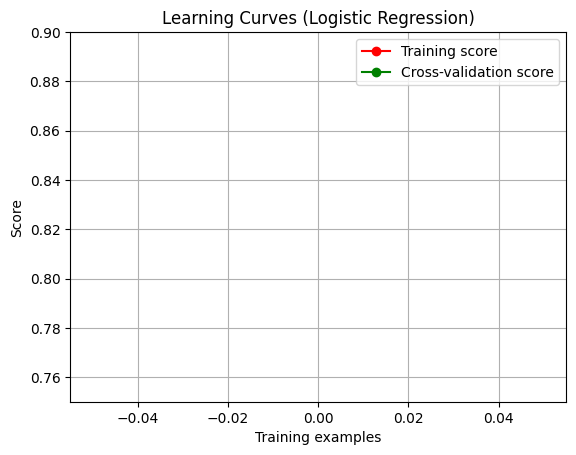

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = df.iloc[:,:-1].values, df.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.5, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=5)
plt.show()

In [ ]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic
    plt.legend(loc="lower right")

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42) #just for bootstrapping
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
X_train

array([[-0.52290345,  0.        , -0.35186815, ..., -0.34717312,
         1.42846988,  0.06304118],
       [-1.61677396,  0.        , -0.36628219, ..., -0.34717312,
         0.19005327,  0.02624909],
       [-0.68671205,  0.        , -0.35239795, ..., -0.34717312,
        -0.32908255,  0.16141841],
       ...,
       [ 1.69306044,  0.        , -0.36205135, ..., -0.34717312,
         0.01520019,  0.00291474],
       [-1.69368464,  0.        , -0.3514082 , ..., -0.34717312,
        -0.72488775, -0.08158868],
       [-1.0277942 ,  0.        , -0.3694382 , ..., -0.34717312,
        -0.52385625, -0.054007  ]])

In [ ]:
# import pandas as pd
# num_samples = data_clean.shape[0]

# # Remove any features that have a different number of samples than the others
# data_clean = data_clean[data_clean.columns[num_samples == num_samples.min()]]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the LabelEncoder object to the target variable
encoder.fit(y)

# Transform the target variable to a categorical variable
y_categorical = encoder.transform(y)
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_categorical)
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

ValueError: ignored

In [ ]:
#PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.15264176 0.08051242 0.07583801 0.07430393 0.066746   0.06622753
 0.06443364 0.06194539 0.05915611 0.05839308]


In [ ]:
features = ['index', 'Loan_Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
data_clean = data_clean[features]
print(X_train.shape)
print(data_clean.shape)

IndexError: ignored

In [ ]:
df

,index,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,0,167728,0,708.000000,7.549080e+05,3,5.0,2.0,4567.22,8.9,34.826609,8,0,137674,358226.0,0.0,0.0
1,1,0,405130,0,701.000000,7.786200e+05,8,6.0,2.0,24007.45,22.5,62.000000,18,0,1136181,1414600.0,0.0,0.0
2,2,1,22242,0,1074.354551,1.378432e+06,2,5.0,2.0,5841.74,6.8,34.826609,8,0,75924,226556.0,0.0,0.0
3,3,0,210012,0,736.000000,1.138385e+06,10,6.0,2.0,14514.29,9.2,25.000000,6,0,31616,46948.0,0.0,0.0
4,4,0,99999999,0,738.000000,9.817680e+05,10,6.0,2.0,22826.22,14.6,34.826609,14,1,175047,266684.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77690,77690,0,147070,0,725.000000,4.754370e+05,7,4.0,7.0,2202.86,22.3,34.826609,5,0,47766,658548.0,0.0,0.0
77691,77691,0,99999999,0,732.000000,1.289416e+06,1,5.0,2.0,13109.05,9.4,21.000000,22,0,153045,509234.0,0.0,0.0
77692,77692,0,103136,0,742.000000,1.150545e+06,6,5.0,2.0,7315.57,18.8,18.000000,12,1,109554,537548.0,1.0,0.0
77693,77693,0,530332,0,746.000000,1.717524e+06,9,5.0,2.0,9890.07,15.0,34.826609,8,0,404225,738254.0,0.0,0.0


In [ ]:
data_clean

,index,Loan_Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,-1.732029,0,-0.365079,-0.618583,-2.767540e-01,-6.187474e-01,-0.850277,-0.600993,-0.330929,-1.142921,-1.322310,-4.713036e-16,-0.623546,-0.347173,-0.429468,-0.045138,-0.333887
1,-1.731984,0,-0.357616,-0.618583,-2.820420e-01,-5.952170e-01,0.577610,0.934116,-0.330929,0.454567,0.609806,1.802413e+00,1.373660,-0.347173,2.311079,0.073780,-0.333887
2,-1.731939,1,-0.369653,-0.618583,1.717642e-16,-2.310472e-16,-1.135854,-0.600993,-0.330929,-1.038188,-1.620651,-4.713036e-16,-0.623546,-0.347173,-0.598950,-0.059961,-0.333887
3,-1.731895,0,-0.363750,-0.618583,-2.556021e-01,-2.382078e-01,1.148764,0.934116,-0.330929,-0.325527,-1.279690,-6.517999e-01,-1.022987,-0.347173,-0.720559,-0.080180,-0.333887
4,-1.731850,0,2.773523,-0.618583,-2.540912e-01,-3.936252e-01,1.148764,0.934116,-0.330929,0.357500,-0.512526,-4.713036e-16,0.574777,1.719612,-0.326892,-0.055443,2.516060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77690,1.731850,0,-0.365729,-0.618583,-2.639118e-01,-8.960777e-01,0.292032,-2.136102,2.857282,-1.337211,0.581392,-4.713036e-16,-1.222708,-0.347173,-0.676233,-0.011331,-0.333887
77691,1.731895,0,2.773523,-0.618583,-2.586238e-01,-8.833372e-02,-1.421432,-0.600993,-0.330929,-0.441002,-1.251276,-9.171202e-01,2.172542,-0.347173,-0.387280,-0.028139,-0.333887
77692,1.731939,0,-0.367110,-0.618583,-2.510695e-01,-2.261410e-01,0.006455,-0.600993,-0.330929,-0.917077,0.084157,-1.116110e+00,0.175336,1.719612,-0.506647,-0.024952,2.516060
77693,1.731984,0,-0.353680,-0.618583,-2.480478e-01,3.364950e-01,0.863187,-0.600993,-0.330929,-0.705519,-0.455699,-4.713036e-16,-0.623546,-0.347173,0.302120,-0.002358,-0.333887


<Axes: >

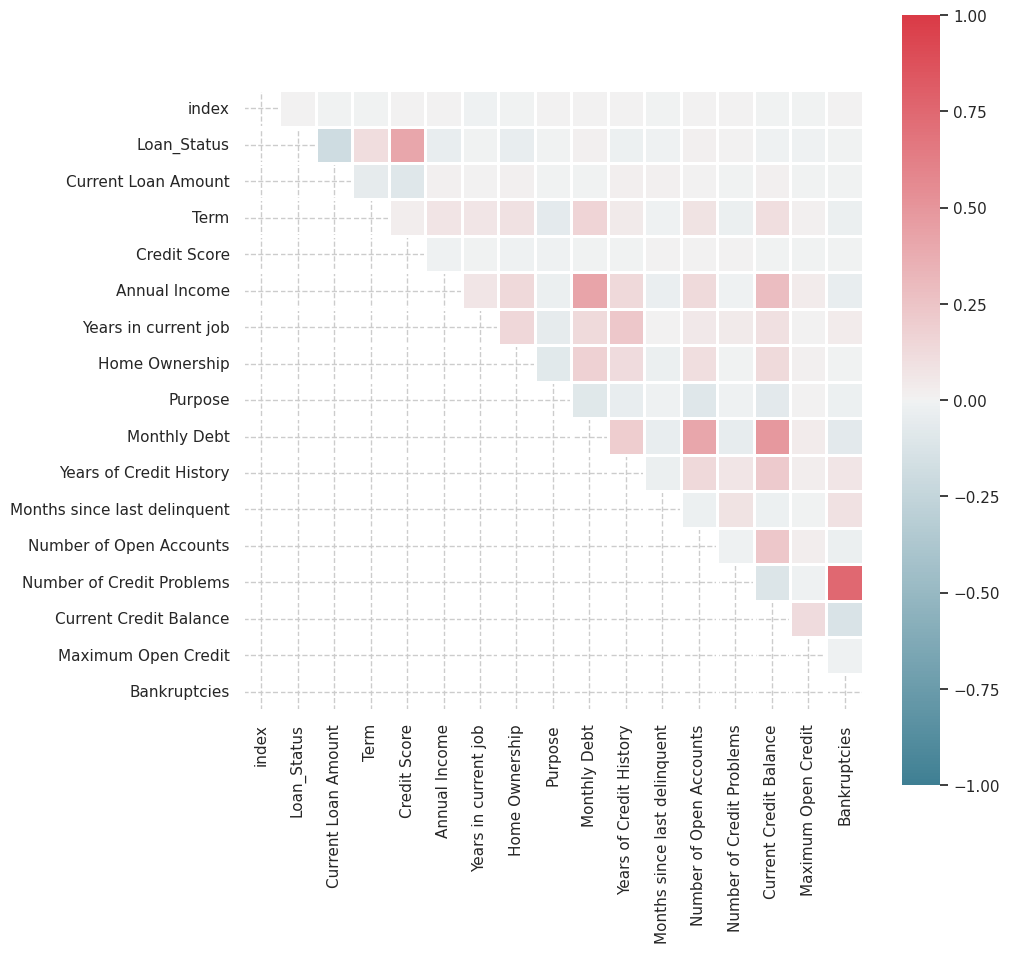

In [ ]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10))
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

Logistic Regression

In [ ]:
data_clean = data_clean.dropna()

In [ ]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

ValueError: ignored

In [ ]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()



NameError: ignored